In [8]:
# Include parent directory to system path in order to work with omrsynth
# without installation for experimental purposes...

import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import skimage

import omrsynth.util.io as io
import omrsynth.util.blendops as bo

from ipywidgets import widgets

In [10]:
reload(bo)

<module 'omrsynth.util.blendops' from '/media/jirka/DATA/Projects/Python/OMR Synthesis/omrsynth/util/blendops.pyc'>

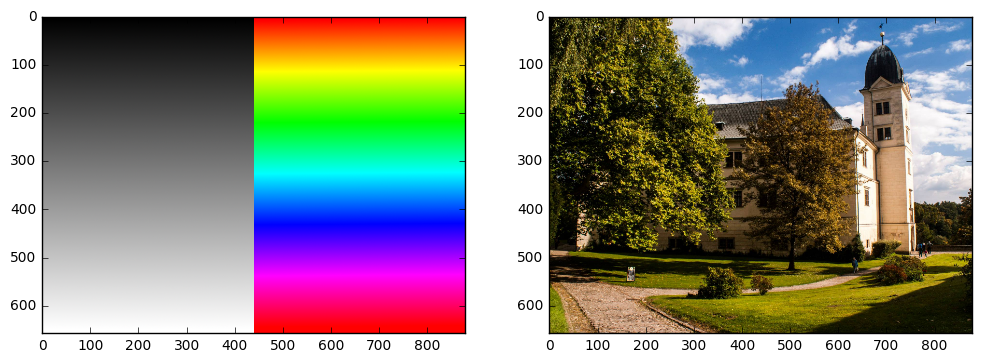

In [11]:
a = io.load_rgb_float('../imgs/gradient.png')
b = io.load_rgb_float('../imgs/castle.png')

# Show the images:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(a);
ax2.imshow(b);

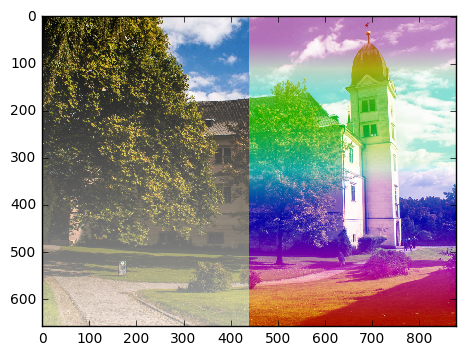

In [14]:
operators = ['normal', 'multiply', 'screen', 'overlay', 'hard_light', 'soft_light',
             'darken_only', 'lighten_only', 'addition', 'subtraction', 'difference',
             'divide', 'dodge', 'burn', 'hue', 'saturation', 'value', 'color']

def update(alpha, operator):
    global a, b
    
    result = bo.blend(a, b, alpha, operator)
    plt.imshow(result, interpolation='nearest');
    skimage.io.imsave('../imgs/blend_out.png', result)

widgets.interact(update,
                 alpha=widgets.FloatSlider(min=0, max=1, step=0.01, value=1),
                 operator=operators
                );